# Translation Transformation

Affine

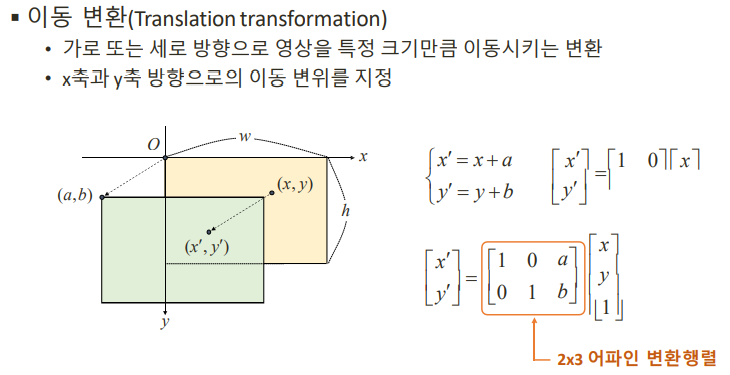

```cv2.warpAffine(src, M, dsize, dst=None, flags=None,
borderMode=None, borderValue=None)```

M : 2x3 어파인 변환행렬. 실수형.

In [1]:
import sys
import numpy as np
import cv2

In [2]:
src = cv2.imread('tekapo.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

In [3]:
# Affine Matrix
aff = np.array([[1, 0, 200],
                [0, 1, 100]], dtype=np.float32)
# => 단순 X로 200 Y로 100 이동

dst = cv2.warpAffine(src, aff, (0, 0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

# Shear Transformation

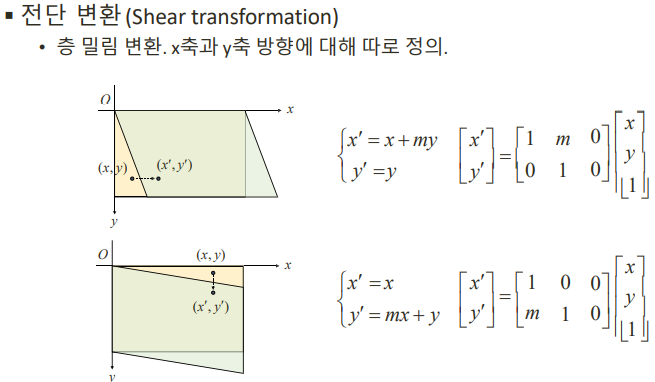

In [4]:
src = cv2.imread('tekapo.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

In [7]:
# Affine Matrix
aff = np.array([[1, 0.5, 0],# x축 방향으로 y의 1/2만큼 더함. x + 0.5y
                [0, 1, 0]], dtype=np.float32)
# ex) 640 x 480 => 640 + 240 = 880



h, w = src.shape[:2]
print(src.shape)

dst = cv2.warpAffine(src, aff, (w + int(h * 0.5), h))
print(dst.shape)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

(480, 640, 3)
480 640
(480, 880)


# Scale Transformation

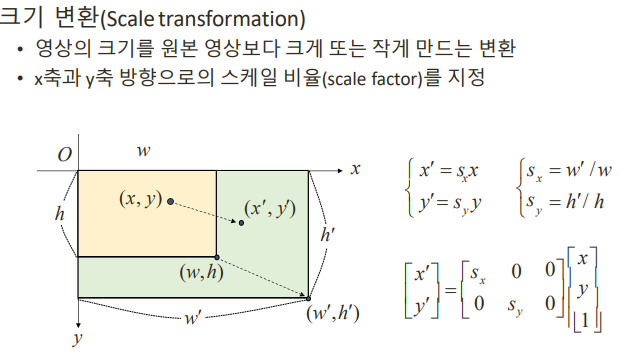

In [ ]:
import sys
import numpy as np
import cv2

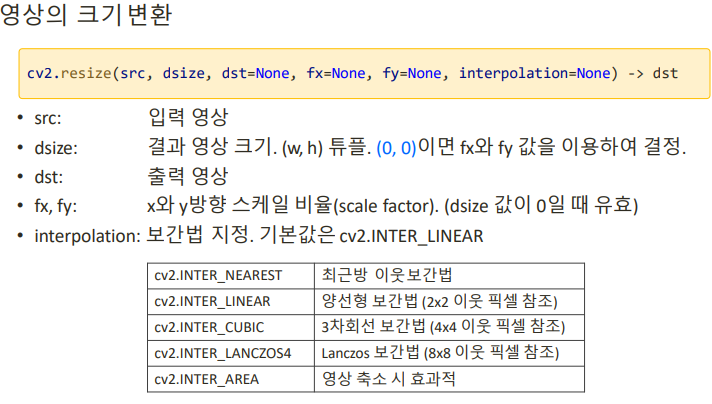

In [ ]:
src = cv2.imread('rose.bmp') # src.shape=(320, 480)

if src is None:
    print('Image load failed!')
    sys.exit()

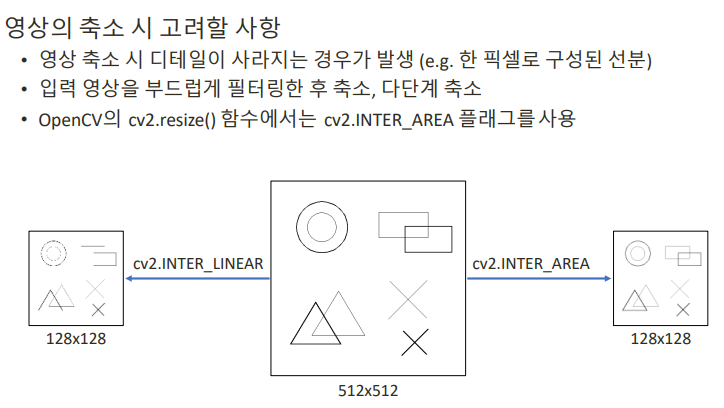

In [ ]:
dst1 = cv2.resize(src, (0, 0), fx=4, fy=4, interpolation=cv2.INTER_NEAREST)
dst2 = cv2.resize(src, (1920, 1280))  # cv2.INTER_LINEAR
dst3 = cv2.resize(src, (1920, 1280), interpolation=cv2.INTER_CUBIC)
dst4 = cv2.resize(src, (1920, 1280), interpolation=cv2.INTER_LANCZOS4)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1[500:900, 400:800]) # INTER_NEAREST
cv2.imshow('dst2', dst2[500:900, 400:800]) # INTER_LINEAR
cv2.imshow('dst3', dst3[500:900, 400:800]) # INTER_CUBIC)
cv2.imshow('dst4', dst4[500:900, 400:800]) # INTER_LANCZOS4
cv2.waitKey()
cv2.destroyAllWindows()

**대칭변환**

```cv2.flip(src, flipCode, dst=None)```

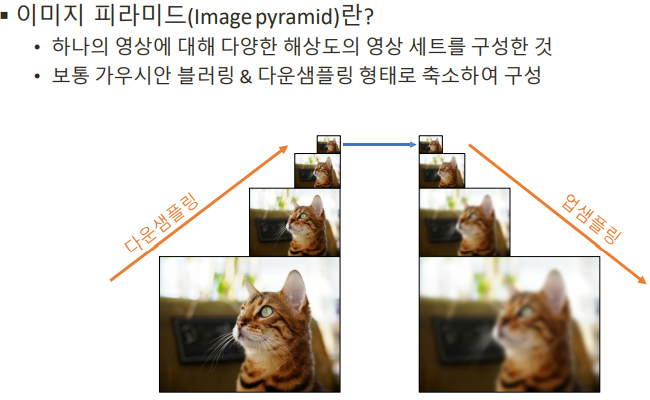

In [8]:
import sys
import numpy as np
import cv2

In [9]:
src = cv2.imread('cat.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

```cv2.pyrDown(src, dst=None, dstsize=None, borderType=None)```

dstsize => 미설정 시 입력 영상의 가로, 세로 1/2로 설정.

```cv2.pyrUp(src, dst=None, dstsize=None, borderType=None)```

dstsize => 미설정 시 입력 영상의 가로, 세로 21배로 설정.

In [10]:
rc = (250, 120, 200, 200)  # rectangle tuple

# 원본 영상에 그리기
cpy = src.copy()
cv2.rectangle(cpy, rc, (0, 0, 255), 2)
cv2.imshow('src', cpy)
cv2.waitKey()

# 피라미드 영상에 그리기
for i in range(1, 4):
    src = cv2.pyrDown(src)
    cpy = src.copy()
    cv2.rectangle(cpy, rc, (0, 0, 255), 2, shift=i)
    cv2.imshow('src', cpy)
    cv2.waitKey()
    cv2.destroyWindow('src')

cv2.destroyAllWindows()

# Rotation Transformation

In [ ]:
import sys
import math
import numpy as np
import cv2

In [ ]:
src = cv2.imread('tekapo.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

In [ ]:
rad = 20 * math.pi / 180 # =? Degree to Radian

# affine 변환 행렬
aff = np.array([[math.cos(rad), math.sin(rad), 0],
                [-math.sin(rad), math.cos(rad), 0]], dtype=np.float32)

dst = cv2.warpAffine(src, aff, (0, 0)) 

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()


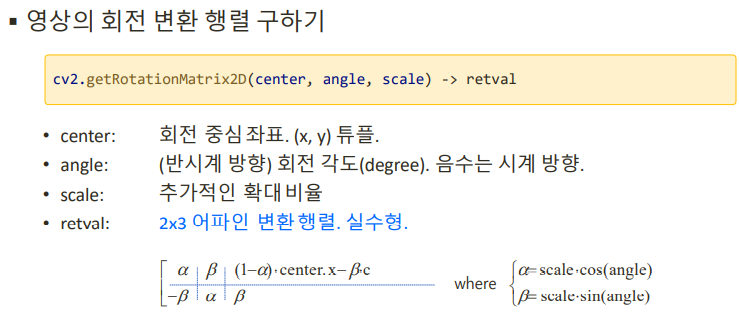

In [ ]:
import sys
import numpy as np
import cv2

In [ ]:
src = cv2.imread('tekapo.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

In [ ]:
cp = (src.shape[1] / 2, src.shape[0] / 2) # Center Position

# Affine Matrix 생성
rot = cv2.getRotationMatrix2D(cp, 20, 0.5) # Center, Degree, Scale

# rad = 20 * math.pi / 180 # =? Degree to Radian

# # affine 변환 행렬
# aff = np.array([[math.cos(rad), math.sin(rad), 0],
#                 [-math.sin(rad), math.cos(rad), 0]], dtype=np.float32)

dst = cv2.warpAffine(src, rot, (0, 0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

# Remapping

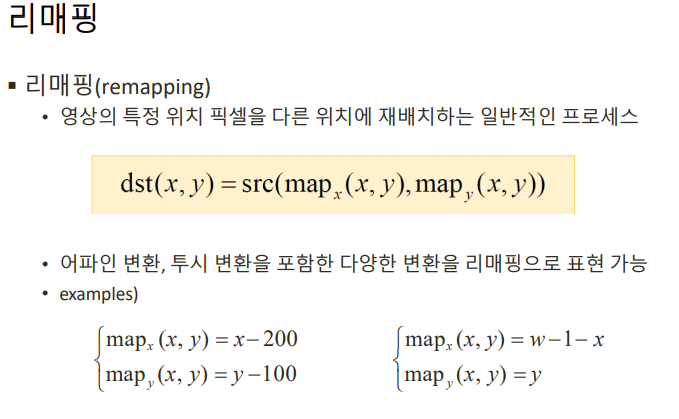

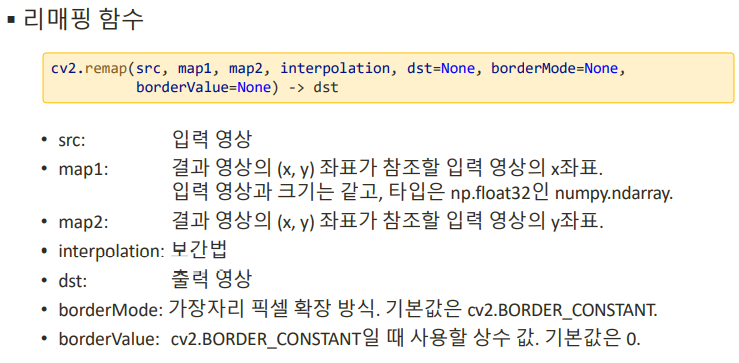

In [11]:
import sys
import numpy as np
import cv2

## Remapping with Trigonometric Functions

In [12]:
src = cv2.imread('tekapo.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

In [13]:
h, w = src.shape[:2]

map2, map1 = np.indices((h, w), dtype=np.float32)

map2 = map2 + 10 * np.sin(map1 / 32)

# Remapping
dst = cv2.remap(src, map1, map2, cv2.INTER_CUBIC, borderMode=cv2.BORDER_DEFAULT)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()